In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from eval_funcs import (
    perplexity_for_corpora,
    wasserstein_distance_embeddings,
    classify_real_vs_synth,
    compute_stat_properties
)

from coherence_utils import compute_topic_coherence

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gowrishankarp/newspaper-text-summarization-cnn-dailymail")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\rynoc\.cache\kagglehub\datasets\gowrishankarp\newspaper-text-summarization-cnn-dailymail\versions\2


In [3]:
cnn_train = pd.read_csv(path + '/cnn_dailymail/train.csv')
cnn_train.head(2)

,id,article,highlights
0,0001d1afc246a7964130f43ae940af6bc6c57f01,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ..."
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...


In [4]:
gemma_data = pd.read_csv('../gemma_1000_outputs.csv').drop('Unnamed: 0', axis=1)
gemma_data.head(2)

,uuid,topic,generated_article,elapsed_time
0,278aa54d-0ed8-4650-886e-99f285cc78e5,World - United Kingdom,The shocking incident occurred in the early ho...,23.479649
1,767d682b-5fde-4186-b3d9-e2de1f8bba8b,World - Middle East,Thousands of Palestinian protesters clashed wi...,17.532754


In [5]:
stats = compute_stat_properties(gemma_data['generated_article'])

In [6]:
ppl = perplexity_for_corpora(cnn_train['article'].sample(1000, random_state=42), gemma_data['generated_article'], batch_size=8, max_length=2048)

[perplexity] device=cpu batch_size=8 max_length(requested)=2048 max_length(effective)=2048
[perplexity] num_docs: real=1000 synthetic=1000 total_batches=250
[perplexity] progress 5/250 | elapsed=51.8s | avg/batch=10.36s | ETA~2538.5s
[perplexity] progress 10/250 | elapsed=106.5s | avg/batch=10.65s | ETA~2555.0s
[perplexity] progress 15/250 | elapsed=167.4s | avg/batch=11.16s | ETA~2622.6s
[perplexity] progress 20/250 | elapsed=219.2s | avg/batch=10.96s | ETA~2520.6s
[perplexity] progress 25/250 | elapsed=283.3s | avg/batch=11.33s | ETA~2549.4s
[perplexity] progress 30/250 | elapsed=336.4s | avg/batch=11.21s | ETA~2466.8s
[perplexity] progress 35/250 | elapsed=396.8s | avg/batch=11.34s | ETA~2437.4s
[perplexity] progress 40/250 | elapsed=459.6s | avg/batch=11.49s | ETA~2412.7s
[perplexity] progress 45/250 | elapsed=518.8s | avg/batch=11.53s | ETA~2363.6s
[perplexity] progress 50/250 | elapsed=589.0s | avg/batch=11.78s | ETA~2356.1s
[perplexity] progress 55/250 | elapsed=660.6s | avg/bat

In [7]:
wd = wasserstein_distance_embeddings(cnn_train['article'].sample(1000, random_state=42), gemma_data['generated_article'], n_projections=128)

[embed:real] device=cpu batch_size=8 max_length(req)=2048 max_length(eff)=2048 num_docs=1000
[embed:real] progress 5/125 | elapsed=43.3s | avg/batch=8.65s | ETA~1038.4s
[embed:real] progress 10/125 | elapsed=88.2s | avg/batch=8.82s | ETA~1014.0s
[embed:real] progress 15/125 | elapsed=137.7s | avg/batch=9.18s | ETA~1010.0s
[embed:real] progress 20/125 | elapsed=179.0s | avg/batch=8.95s | ETA~939.8s
[embed:real] progress 25/125 | elapsed=227.3s | avg/batch=9.09s | ETA~909.2s
[embed:real] progress 30/125 | elapsed=266.3s | avg/batch=8.88s | ETA~843.3s
[embed:real] progress 35/125 | elapsed=309.4s | avg/batch=8.84s | ETA~795.5s
[embed:real] progress 40/125 | elapsed=353.4s | avg/batch=8.83s | ETA~750.9s
[embed:real] progress 45/125 | elapsed=396.0s | avg/batch=8.80s | ETA~703.9s
[embed:real] progress 50/125 | elapsed=449.0s | avg/batch=8.98s | ETA~673.5s
[embed:real] progress 55/125 | elapsed=500.3s | avg/batch=9.10s | ETA~636.8s
[embed:real] progress 60/125 | elapsed=544.3s | avg/batch=9.

In [8]:
clf_res = classify_real_vs_synth(cnn_train['article'].sample(1000, random_state=42), gemma_data['generated_article'], cv=5)

[classify] batch_size=8 max_length=2048 cv=5 Cs=[0.1, 0.5, 1.0, 2.0, 5.0]
[embed:real] device=cpu batch_size=8 max_length(req)=2048 max_length(eff)=2048 num_docs=1000
[embed:real] progress 5/125 | elapsed=41.7s | avg/batch=8.35s | ETA~1001.4s
[embed:real] progress 10/125 | elapsed=84.6s | avg/batch=8.46s | ETA~972.5s
[embed:real] progress 15/125 | elapsed=132.4s | avg/batch=8.83s | ETA~970.9s
[embed:real] progress 20/125 | elapsed=171.3s | avg/batch=8.57s | ETA~899.4s
[embed:real] progress 25/125 | elapsed=217.0s | avg/batch=8.68s | ETA~868.1s
[embed:real] progress 30/125 | elapsed=254.1s | avg/batch=8.47s | ETA~804.6s
[embed:real] progress 35/125 | elapsed=296.8s | avg/batch=8.48s | ETA~763.1s
[embed:real] progress 40/125 | elapsed=341.2s | avg/batch=8.53s | ETA~725.0s
[embed:real] progress 45/125 | elapsed=383.8s | avg/batch=8.53s | ETA~682.3s
[embed:real] progress 50/125 | elapsed=438.6s | avg/batch=8.77s | ETA~657.8s
[embed:real] progress 55/125 | elapsed=491.1s | avg/batch=8.93s |

## Evaluation Metrics

## Coherence Evaluation

In [9]:

coherence_result = compute_topic_coherence(
        gemma_data['generated_article'],
        sample_size=1000,
        num_topics=15,
        random_seed=42
    )

Processing texts: 100%|██████████| 1000/1000 [00:01<00:00, 795.47it/s]


In [18]:
print("Statistical Properties:\n", stats)
print("\nPerplexity:", ppl)
print("\nWasserstein Distance:", wd)
print("\nClassification Results:\n", clf_res)
print("\nTopic Coherence:\n", coherence_result)
# Save evaluation results to CSV
gemma_evaluation_results = pd.DataFrame({
    'Statistical Properties': [stats],
    'Perplexity': [ppl],
    'Wasserstein Distance': [wd],
    'Classification Results': [clf_res],
    'Topic Coherence': [coherence_result]
})  

gemma_evaluation_results.to_csv('./gemma_evaluation_results.csv', index=False)

Statistical Properties:
 {'avg_len_tokens': 417.7130126953125, 'std_len_tokens': 49.771141052246094, 'avg_len_chars': 2094.407, 'ttr': 0.04242625917795233, 'hapax_ratio': 0.29528269946958585}

Perplexity: {'real': {'corpus_ppl': 20.093066539453186}, 'synthetic': {'corpus_ppl': 16.23374302475765}}

Wasserstein Distance: {'mean_distance': 0.1749243667226721, 'distances': [0.051647695422305066, 0.2792836723301164, 0.07837621710661856, 0.07591933825603726, 0.07556516151294253, 0.13613076703060198, 0.1391228040694846, 0.08479117363404778, 0.13699433887335094, 0.1666035728286574, 0.07872583072957198, 0.4450833872402298, 0.07331569803935051, 0.2207580099242916, 0.3957706078460127, 0.044412823088606265, 0.07603467694331592, 0.32091072294943307, 0.06287121610426744, 0.10814677801514963, 0.07410778971900961, 0.3180219087578231, 0.06975874282645642, 0.046511936029301024, 0.3411546181252455, 0.15312520633815288, 0.16424612215920686, 0.08847835708606326, 0.1874236339161462, 0.12747994242356014, 0.0

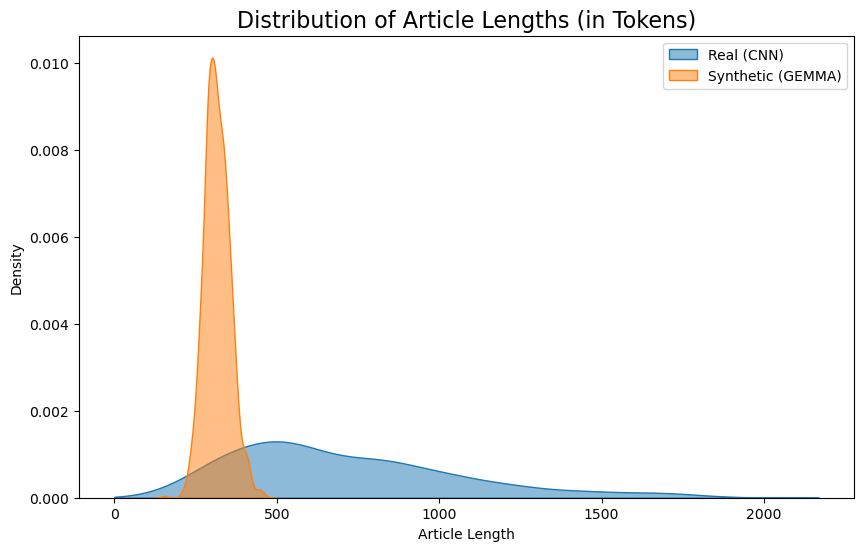

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path

# Sample real data to match synthetic data size
real_texts = cnn_train['article'].sample(1000, random_state=42)
synth_texts = gemma_data['generated_article']

len_real = real_texts.str.split().str.len()
len_synth = synth_texts.str.split().str.len()

# Create the plot
plt.figure(figsize=(10, 6))
sns.kdeplot(len_real, label='Real (CNN)', fill=True, alpha=0.5, clip=(0, 4000))
sns.kdeplot(len_synth, label='Synthetic (GEMMA)', fill=True, alpha=0.5, clip=(0, 4000))

plt.title('Distribution of Article Lengths (in Tokens)', fontsize=16)
plt.xlabel('Article Length')
plt.ylabel('Density')
plt.legend()
folder_path = "./figures/gemma"
folder = Path(folder_path)
folder.mkdir(parents=True, exist_ok=True)
plt.savefig(folder_path + '/article_length_distribution.png')
plt.show()

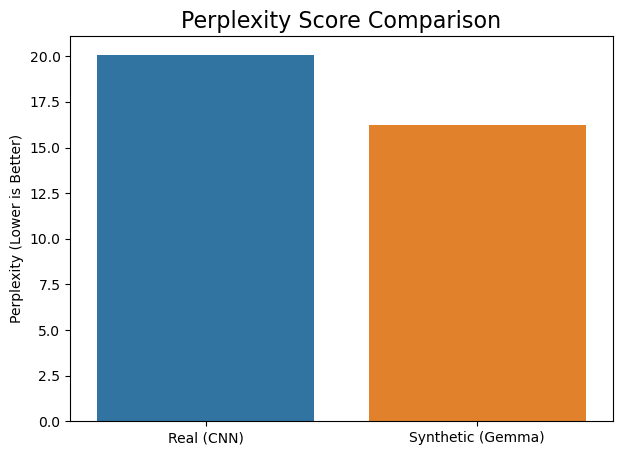

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Get the data from your 'ppl' variable
ppl_scores = {
    'Real (CNN)': ppl['real']['corpus_ppl'],
    'Synthetic (Gemma)': ppl['synthetic']['corpus_ppl']
}

# 2. Create the plot
plt.figure(figsize=(7, 5))
sns.barplot(x=list(ppl_scores.keys()), y=list(ppl_scores.values()))

plt.title('Perplexity Score Comparison', fontsize=16)
plt.ylabel('Perplexity (Lower is Better)')
folder_path = "./figures/gemma"
folder = Path(folder_path)
folder.mkdir(parents=True, exist_ok=True)
plt.savefig(folder_path+'/perplexity_comparison.png')
plt.show()

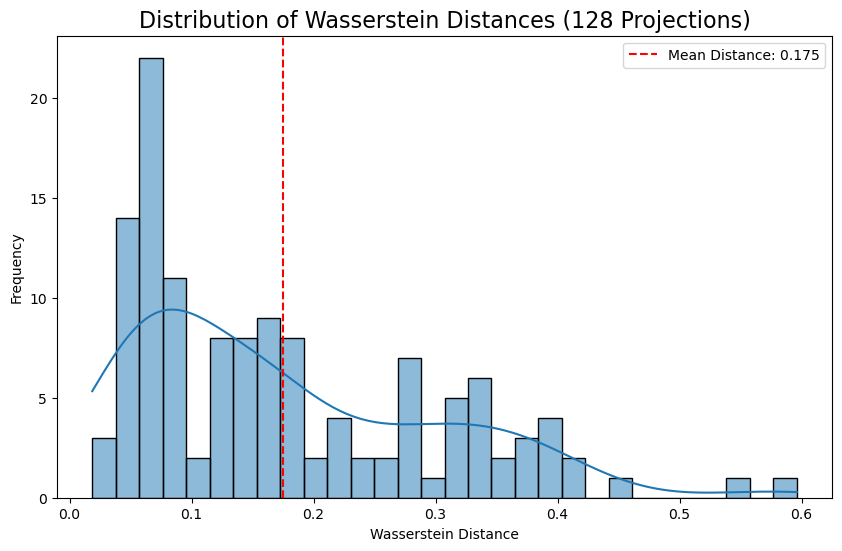

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get data from 'wd'
distances = wd['distances']
mean_dist = wd['mean_distance']

# Create plot
plt.figure(figsize=(10, 6))
sns.histplot(distances, bins=30, kde=True)

plt.axvline(mean_dist, color='red', linestyle='--', label=f'Mean Distance: {mean_dist:.3f}')
plt.title('Distribution of Wasserstein Distances (128 Projections)', fontsize=16)
plt.xlabel('Wasserstein Distance')
plt.ylabel('Frequency')
plt.legend()
folder_path = "./figures/gemma"
folder = Path(folder_path)
folder.mkdir(parents=True, exist_ok=True)
plt.savefig(folder_path+'/wasserstein_distance_distribution.png')
plt.show()

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd

# Compute embeddings

real_texts = cnn_train['article'].sample(1000, random_state=42)
synth_texts = gemma_data['generated_article']

print("Computing embeddings for REAL texts (for t-SNE)...")
Er = compute_opt_embeddings(
    real_texts, 
    batch_size=8, 
    max_length=2048, 
    verbose=True, 
    label="real_tsne"
)

print("\nComputing embeddings for SYNTHETIC texts (for t-SNE)...")
Es = compute_opt_embeddings(
    synth_texts, 
    batch_size=8, 
    max_length=2048, 
    verbose=True, 
    label="synth_tsne"
)

# Combine embeddings and create labels
embeddings = np.concatenate([Er, Es], axis=0)
labels = ['Real (CNN)'] * len(Er) + ['Synthetic (Gemma)'] * len(Es)

print(f"\nRunning t-SNE on {embeddings.shape[0]} embeddings")

# Reduce 768 dimensions down to 2
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(embeddings)

# Create dataframe and plot

df_tsne = pd.DataFrame({
    'tsne_1': tsne_results[:, 0],
    'tsne_2': tsne_results[:, 1],
    'label': labels
})

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='tsne_1', y='tsne_2',
    hue='label',
    palette=sns.color_palette("hls", 2),
    data=df_tsne,
    alpha=0.7
)

plt.title('t-SNE Projection of Real vs. Synthetic Embeddings (OPT-125m)', fontsize=16)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(loc='best')
folder_path = "./figures/gemma"
folder = Path(folder_path)
folder.mkdir(parents=True, exist_ok=True)
plt.savefig(folder_path+'/tsne_embeddings.png')
plt.show()

Computing embeddings for REAL texts (for t-SNE)...


NameError: name 'compute_opt_embeddings' is not defined